# Programming Question : Heart Attack Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset # this method will help us to #download the Titanic dataset
from IPython.display import display

In [2]:
heart = pd.read_csv('heart.csv')
display(heart)
heart.columns

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

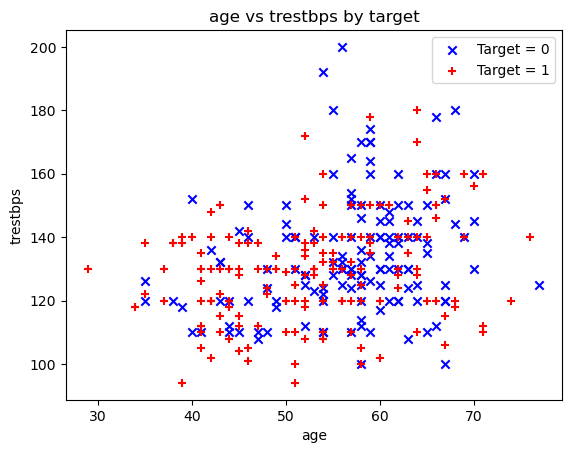

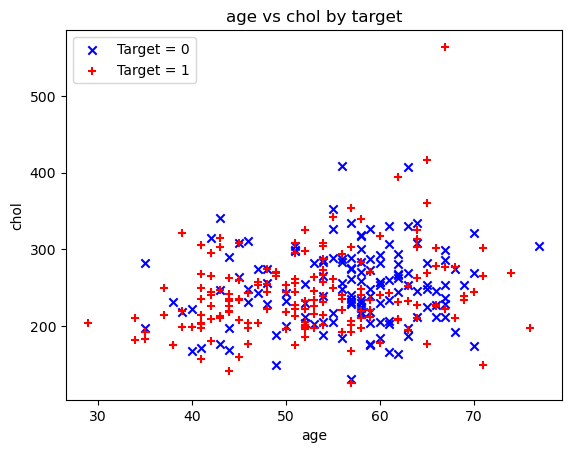

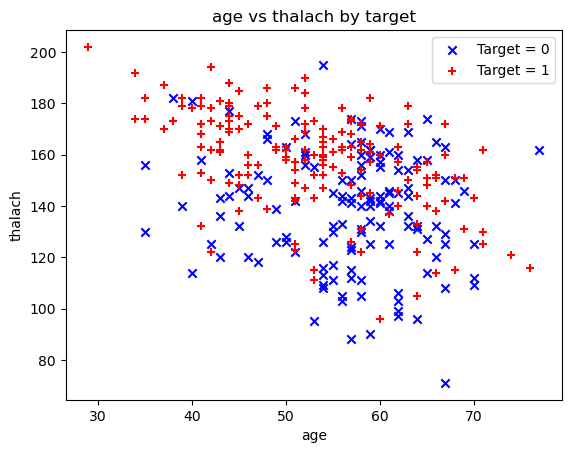

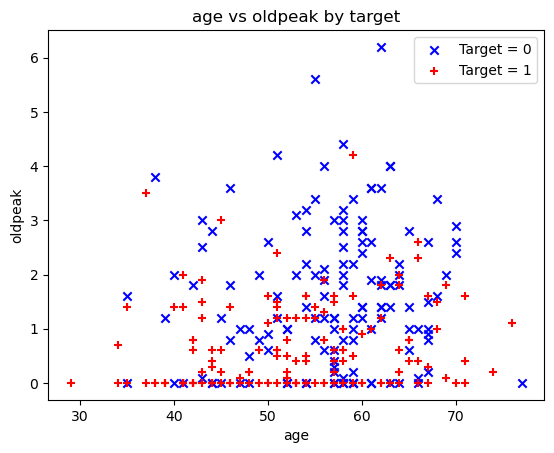

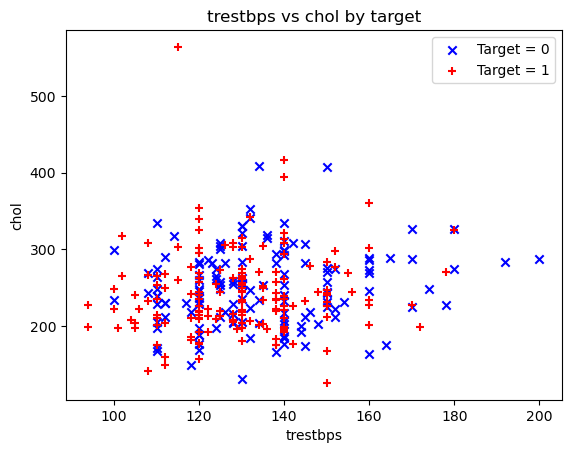

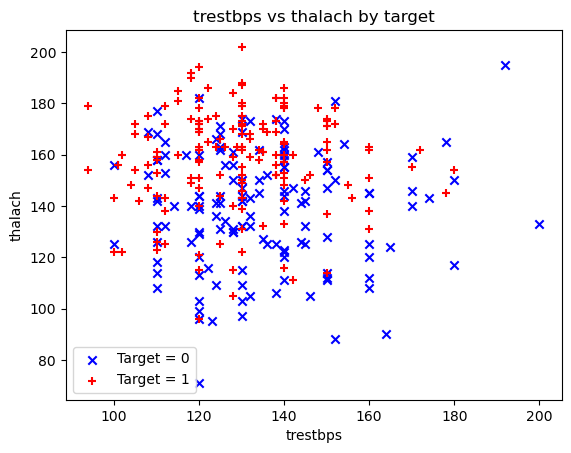

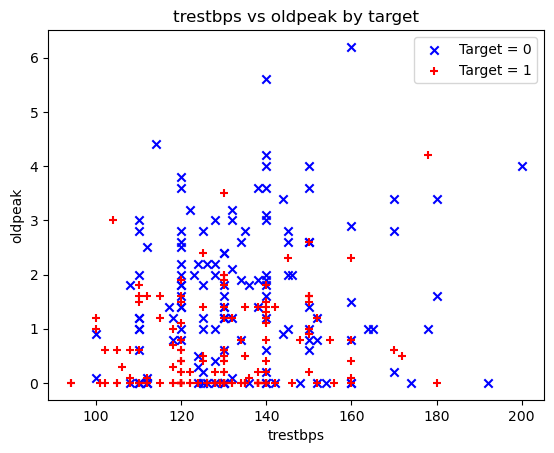

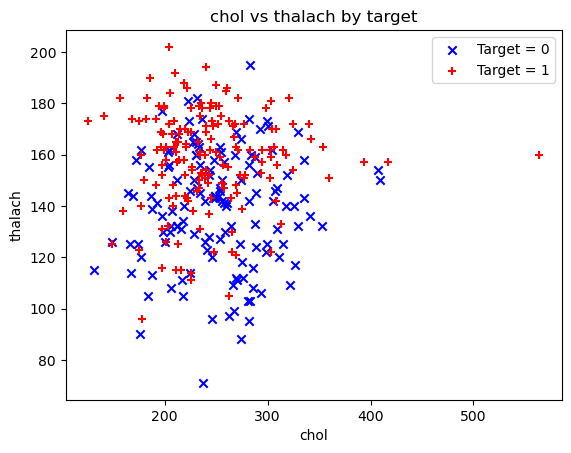

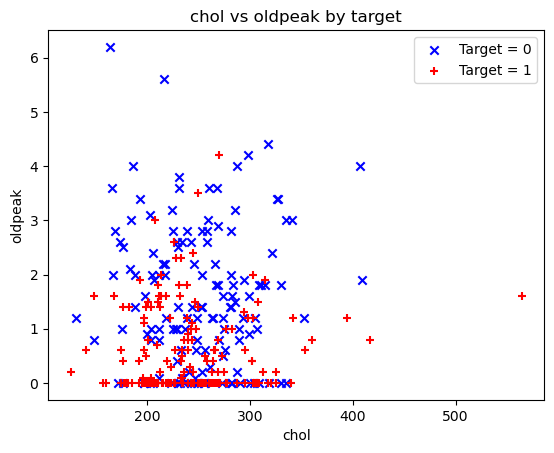

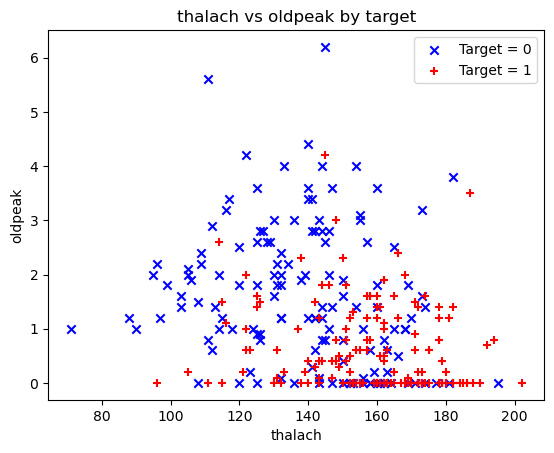

In [3]:
# 1. Create and compile as many plots as you can using the matplotlib library for the
# given dataset.
heart_0 = heart[heart['target'] == 0]
heart_1 = heart[heart['target'] == 1]
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] 
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


# 1.1 ploting with 2 num features + target
def heart_num_num_target(feature1, feature2, target):
    
    plt.scatter(heart_0[feature1], heart_0[feature2], color='b', label='Target = 0', marker='x')
    plt.scatter(heart_1[feature1], heart_1[feature2], color='r', label='Target = 1', marker='+')
    
    plt.title(f'{feature1} vs {feature2} by {target}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()

    plt.show()


for i in range(len(num_features)):
    for j in range(len(num_features)):
        if i < j:
            heart_num_num_target(num_features[i], num_features[j], 'target')



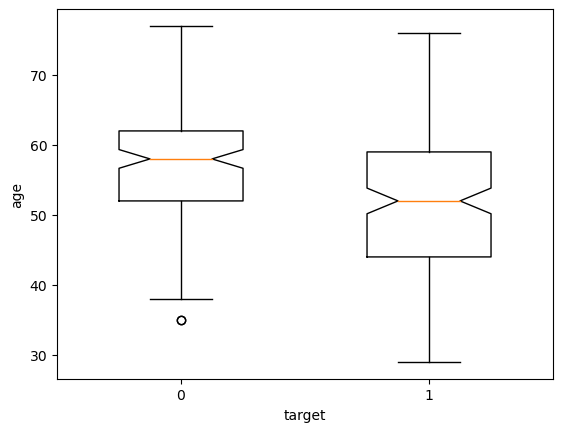

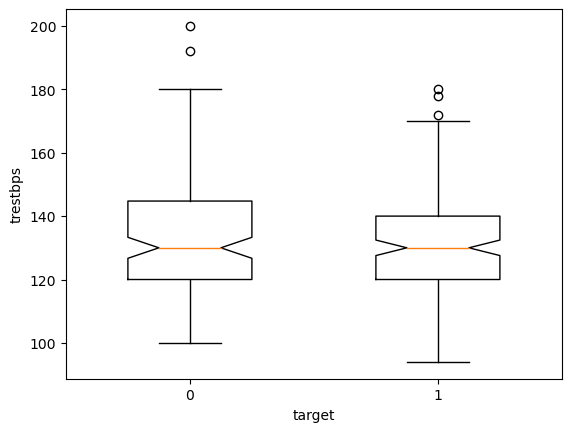

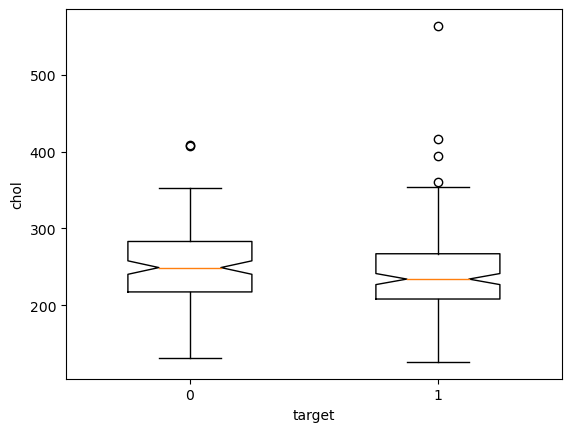

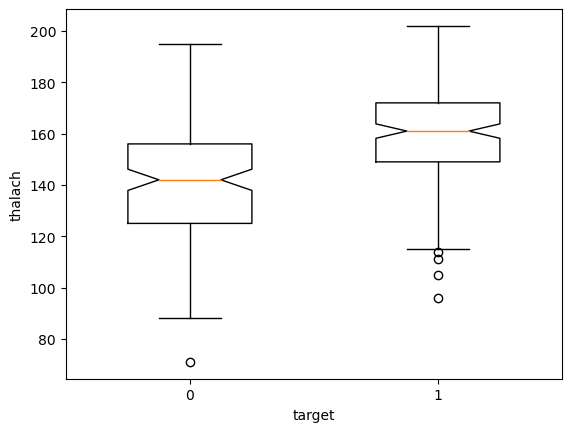

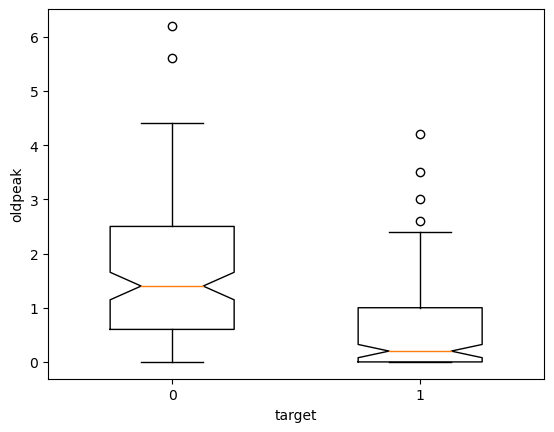

In [4]:
# 1.2
# and more plot:

# (1 feature & 1 target)
# num feature
def heart_num_target(num_feature):
    plt.boxplot([heart_0[num_feature], heart_1[num_feature]], notch=True, widths=(0.5,0.5))
    plt.xlabel('target')
    plt.ylabel(num_feature)
    plt.xticks([1,2],['0','1'])
    plt.show()
    
# note num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] 
for feature_i in num_features:
    heart_num_target(feature_i)
    

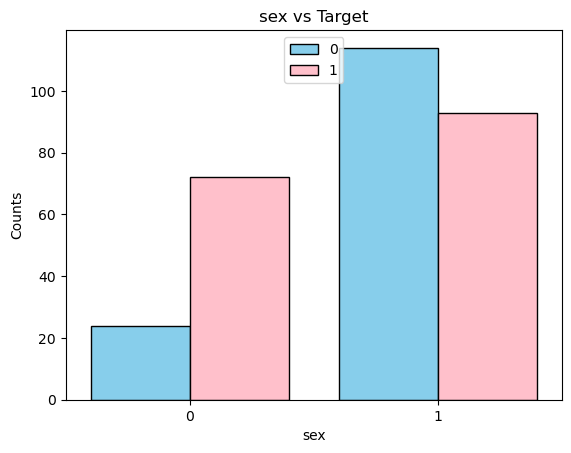

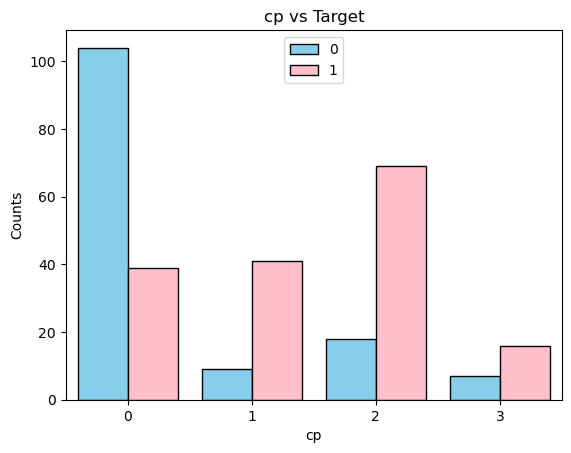

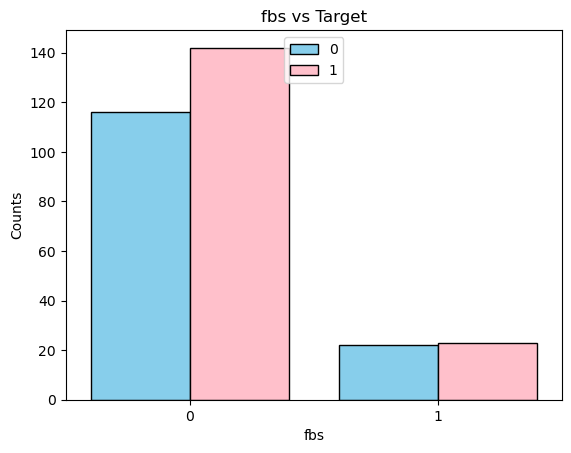

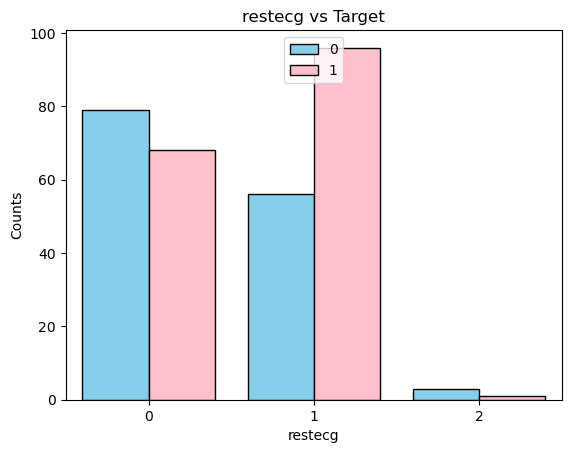

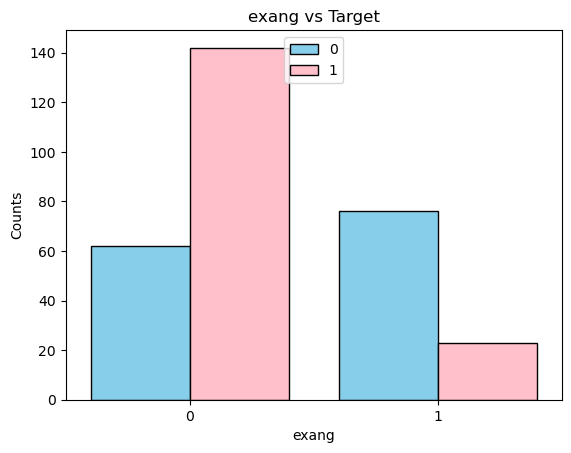

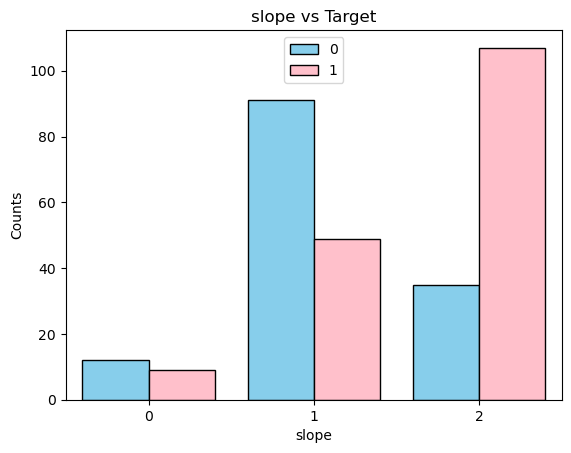

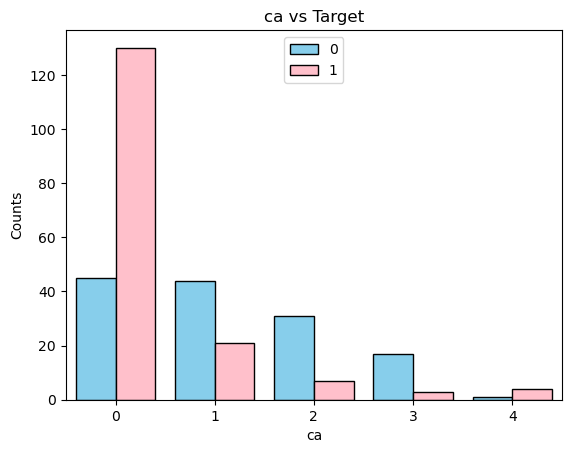

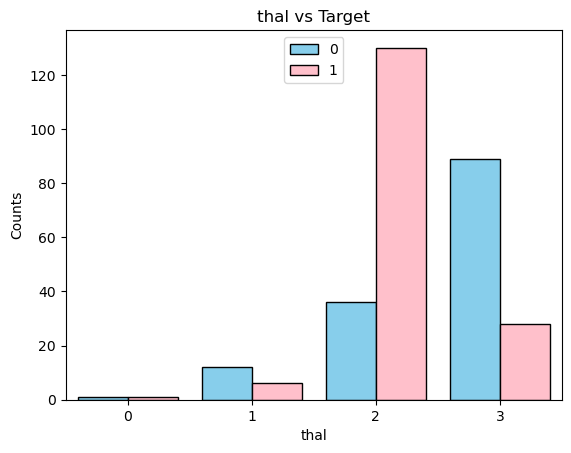

In [5]:
# 1.3 cat features
# cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


def heart_cat_target(cat_feature):
    sns.countplot(x=cat_feature, hue='target', data=heart,
                  hue_order=[0, 1], palette=['SkyBlue', 'Pink'],
                  saturation=1, edgecolor='black')
    
    plt.legend(loc='upper center')
    plt.xlabel(cat_feature)
    plt.ylabel('Counts')
    plt.title(f'{cat_feature} vs Target')
    plt.show()

    
for feature in cat_features:
    heart_cat_target(feature)


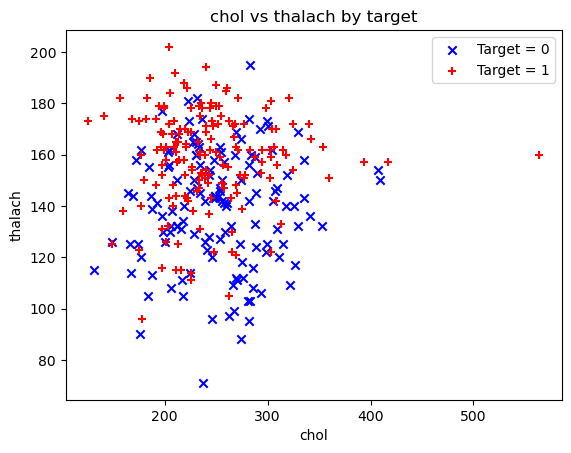

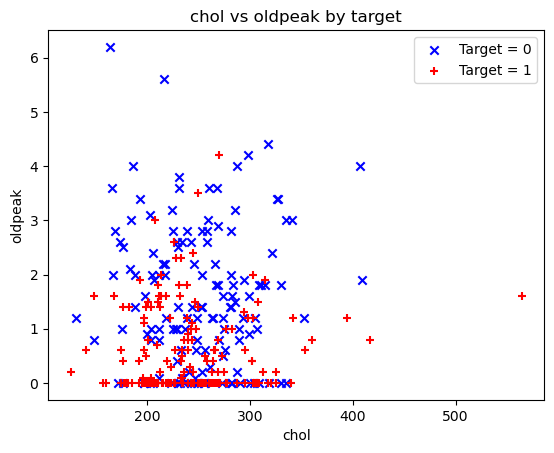

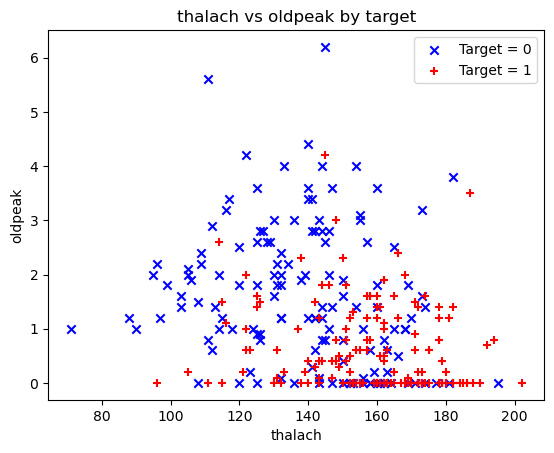

In [6]:
# 2. Use the created plots to try to find some numerical features that can be used for
# good classification models (similar to the example in class find features that help
# in linearly separating data)

# If only using numerical features,
# it feels like these pairs of num-feature have relatively more clear separation:
# (chol, thalach)
# (chol, oldpeak)
# (thalach, oldpeak)

heart_num_num_target('chol', 'thalach', 'target')
heart_num_num_target('chol', 'oldpeak', 'target')
heart_num_num_target('thalach', 'oldpeak', 'target')


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix


In [8]:
# 3. Split the dataset into 70% train and 30% test.
# 4. Implement the Logistic Regression classification algorithm
# 5. Use the evaluation metrics discussed in the class to see how well your models
# have performed for the given dataset.


def heart_log_reg_df(features, target):
    X = heart[features]
    y = heart[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    con_matr = confusion_matrix(y_test, y_pred)
    
    
    evals = {
        "Features": ", ".join(features),
        "Precision": con_matr[1][1] / (con_matr[1][1] + con_matr[0][1]), # TP / (TP + FP)
        "Recall": con_matr[1][1] / (con_matr[1][1] + con_matr[1][0]), # TP / (TP + FN)
        "Accuracy": (con_matr[1][1] + con_matr[0][0]) / (con_matr[1][1] + con_matr[0][0] + con_matr[0][1] + con_matr[1][0]), # (TP + TN) / (TP + TN + FP + FN)
        "F1 Score": (2 * (con_matr[1][1] / (con_matr[1][1] + con_matr[0][1])) * (con_matr[1][1] / (con_matr[1][1] + con_matr[1][0]))) / ((con_matr[1][1] / (con_matr[1][1] + con_matr[0][1])) + (con_matr[1][1] / (con_matr[1][1] + con_matr[1][0]))), # 2 * (Precision * Recall) / (Precision + Recall)
        "Confusion Matrix": con_matr
    }

    
    return evals

results = []

results.append(heart_log_reg_df(['chol','thalach'], 'target'))
results.append(heart_log_reg_df(['chol', 'oldpeak'], 'target'))
results.append(heart_log_reg_df(['thalach', 'oldpeak'], 'target'))
results.append(heart_log_reg_df(['chol','thalach', 'oldpeak'], 'target'))


results_df = pd.DataFrame(results)
results_df


,Features,Precision,Recall,Accuracy,F1 Score,Confusion Matrix
0,"chol, thalach",0.683333,0.872340,0.725275,0.766355,"[[25, 19], [6, 41]]"
1,"chol, oldpeak",0.600000,0.829787,0.626374,0.696429,"[[18, 26], [8, 39]]"
2,"thalach, oldpeak",0.696429,0.829787,0.725275,0.757282,"[[27, 17], [8, 39]]"
3,"chol, thalach, oldpeak",0.696429,0.829787,0.725275,0.757282,"[[27, 17], [8, 39]]"
